

# Project 2 : Investigate a Dataset (No Shows Appointment)
Hend Abdulrhman Alrehaili

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have chosen No Shows Appointment (original source on
https://www.kaggle.com/joniarroba/noshowappointments)to analyze the data and I want to know the percentage of Patient who show up for the appointment and Patient do not? 
who are more committed to the appointment more men or women?
Which neighborhood is more punctual?
Do people come when the hospital remind them of the appointment by sending a message?
Are people with chronic diseases more punctual or not?



In [1]:
#import pandas
import pandas as pd  


#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

### General Properties

### Loading and cleaning  Data 

In [2]:
# Load your data and print out a few lines. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(200)



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,6.521816e+14,5642656,M,2016-04-29T16:40:57Z,2016-04-29T00:00:00Z,34,SANTA CLARA,0,0,0,0,0,0,No
196,7.563352e+12,5642008,F,2016-04-29T14:56:15Z,2016-04-29T00:00:00Z,19,CENTRO,0,0,0,0,0,0,No
197,1.753268e+12,5641423,M,2016-04-29T13:33:21Z,2016-04-29T00:00:00Z,58,CENTRO,0,1,0,0,0,0,No
198,2.146354e+13,5641064,F,2016-04-29T12:14:05Z,2016-04-29T00:00:00Z,49,PARQUE MOSCOSO,0,0,0,0,0,0,No


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  Noshow          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


the information show we have 110527 Patient and we have 110527 rows and 14 columns 
there is no missing data

In [4]:
print('number of duplicates sum is',(df.duplicated())) #to show if there is duplicates or not

number of duplicates sum is 0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool


there is no duplicated data

In [5]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']) #to change type for AppointmentDay and ScheduledDay from object to datetime 
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  Noshow        

I use pd.to_datetime to change type for AppointmentDay and ScheduledDay from object to datetime 

In [6]:
df.drop(columns=['PatientId', 'AppointmentID'])

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


I remove the columns PatientId and AppointmentID we don't need it in our analysis

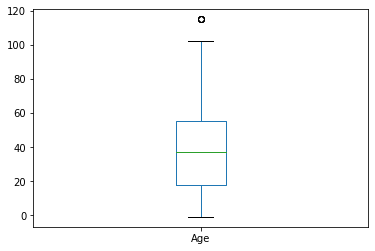

In [7]:
df['Age'].plot(kind='box');

In [8]:
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


I see there is one negative value in age column

In [9]:
df[df.Age < 0] = 0

I use it to replace -1 by 0

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474921e+14,5.675253e+06,37.088883,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560935e+14,7.331035e+04,23.110190,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680571e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725522e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (percentage of Patient who show up for the appointment and Patient do not? )

Text(0.5, 1.0, 'Percentage of Patient who show up and Patient do not')

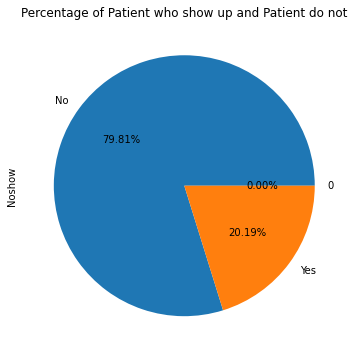

In [11]:
df['Noshow'].value_counts().plot(kind='pie',autopct='%.2f%%',figsize=(6,6))
plt.title('Percentage of Patient who show up and Patient do not')

I asked this question to find out the percentage of patient who showed up and who did not show up for the appointment and the chart shows that most of patient does not show

### Research Question 2  (Which neighborhood is more punctual?)

Text(0.5, 1.0, 'Number of patient who show up and who do not from each neighborhood')

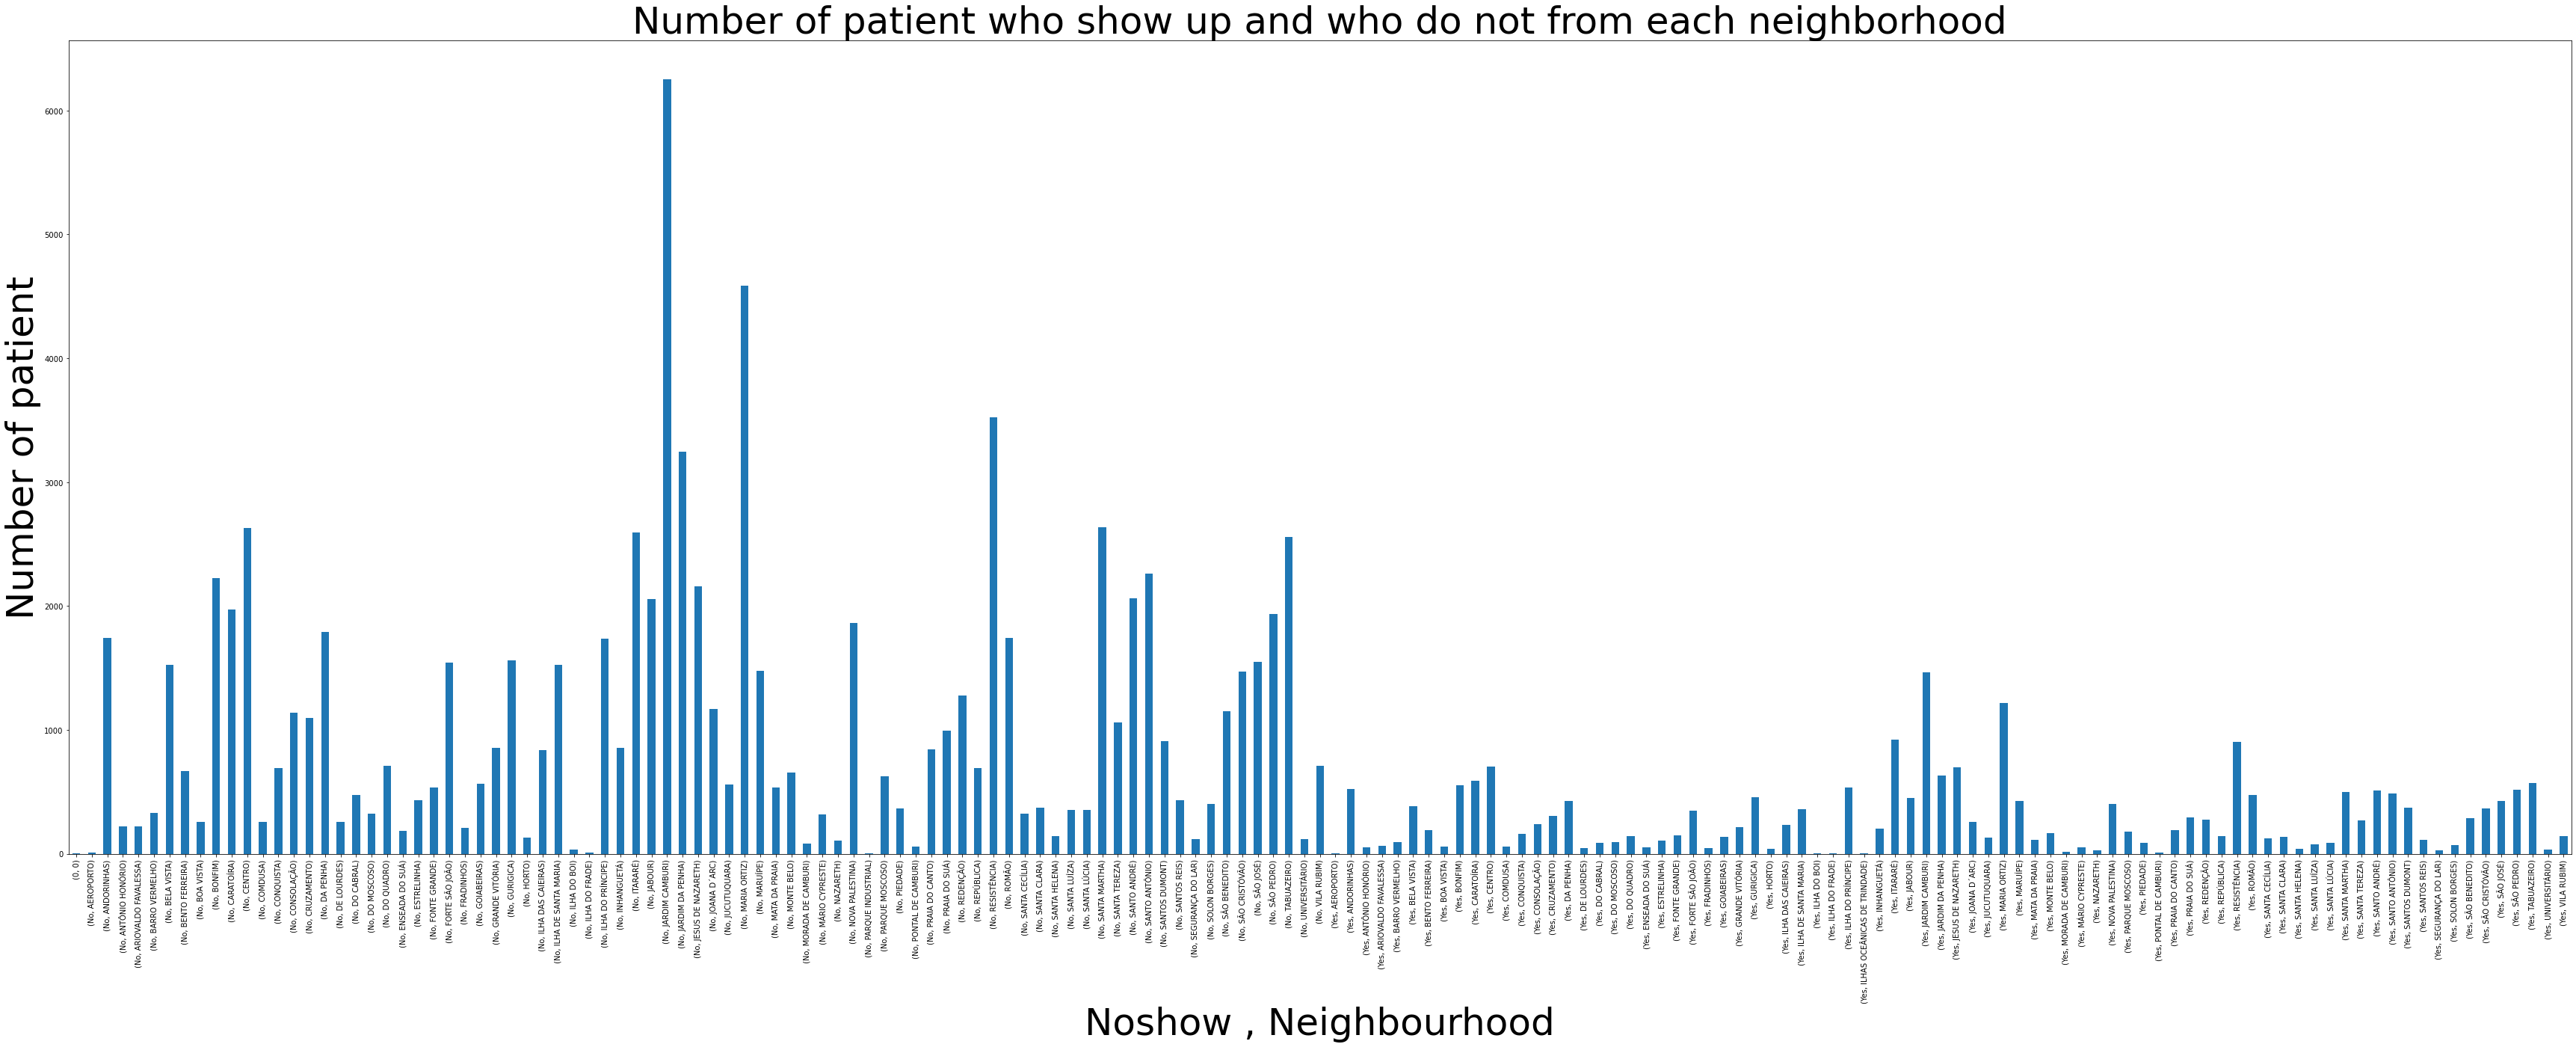

In [12]:
df.groupby(['Noshow','Neighbourhood']).count()['PatientId'].plot(kind='bar',figsize=(60,20))
plt.ylabel('Number of patient', fontsize=50)
plt.xlabel('Noshow , Neighbourhood', fontsize=50)
plt.title('Number of patient who show up and who do not from each neighborhood',fontsize=50)

I see that JARDIM CAMBUR has the highest number of people who book appointment, whether they show up or not

### Research Question 3  (Do people come when the hospital remind them of the appointment by sending a message?)


Text(0.5, 1.0, 'percent of patient who show up when they receive a message ')

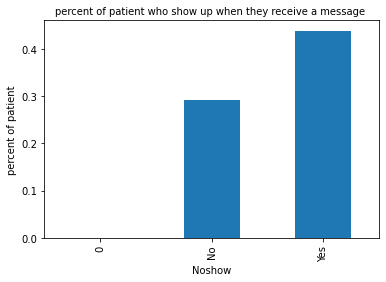

In [13]:
df.groupby('Noshow')['SMS_received'].mean().plot(kind='bar')
plt.ylabel('percent of patient', fontsize=10)
plt.xlabel('Noshow', fontsize=10)
plt.title('percent of patient who show up when they receive a message ',fontsize=10)

From the graph, I see that people come to appointment more when they get a reminder message

### Research Question 4  (who are more committed to the appointment more men or women?)


Text(0.5, 1.0, 'number of patient who show up and patient they do not divided by gender ')

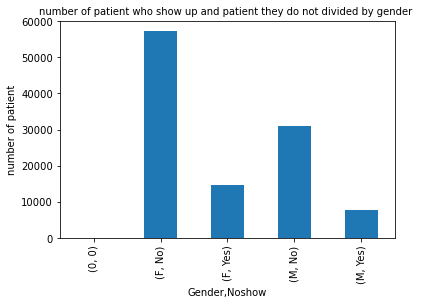

In [14]:
df.groupby(['Gender','Noshow']).count()['PatientId'].plot(kind='bar')
plt.ylabel('number of patient', fontsize=10)
plt.xlabel('Gender,Noshow', fontsize=10)
plt.title('number of patient who show up and patient they do not divided by gender ',fontsize=10)

I asked this question to know more committed when they book appointment and from graph women booked appointments 
more than men and both do not usually come to the appointment

### Research Question 4  (Are people with chronic diseases more punctual or not?)

Text(0.5, 1.0, 'number of patient who show up and patient they do not divided by if they have chronic diseases or not')

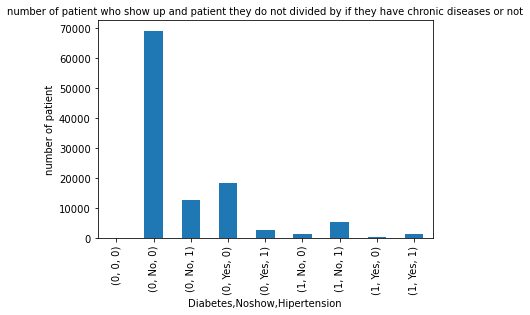

In [15]:
df.groupby(['Diabetes','Noshow','Hipertension']).count()['PatientId'].plot(kind='bar')
plt.ylabel('number of patient', fontsize=10)
plt.xlabel('Diabetes,Noshow,Hipertension', fontsize=10)
plt.title('number of patient who show up and patient they do not divided by if they have chronic diseases or not',fontsize=10)

The chart shows patients with chronic diseases, most of whom also do not show for appointment
But people with high blood pressure book an appointment more than diabetes and less than half of them come to mind
The same also applies to diabetics and patients with diabetes and high blood pressure

### limitations


I had difficulty with negative values. 
I hope in the future will be more features, for example, if the patient had pain, will they attend to the appointment or not?

<a id='conclusions'></a>
## Conclusions

Finally, 20.19% of patients who come to thier appointment and that show the most patients they do not come and most of them women and I notice patients come to their appointment more if the hospital send reminder message to them.



In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255